In [1]:
# single-cell analysis package
library(Seurat)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

Attaching SeuratObject

‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


A

## Preprocessing

In [2]:
data <- readRDS('/home/lorna/Downloads/GSE143526_liver.combined.sub_01102020.rds')

In [3]:
table(Idents(data))


Hep.Zonation1 Hep.Zonation2 Hep.Zonation3 Hep.Zonation4            EC 
         5260          4147          2283          1633          2064 
      Kupffer           HSC        T.cell        B.cell          Chol 
         1013          1343           314           115            67 

In [4]:
data$cell_type <- Idents(data)

In [5]:
data$cell_type <- gsub(pattern = "Hep.Zon.*", replacement = "Hep", data$cell_type)

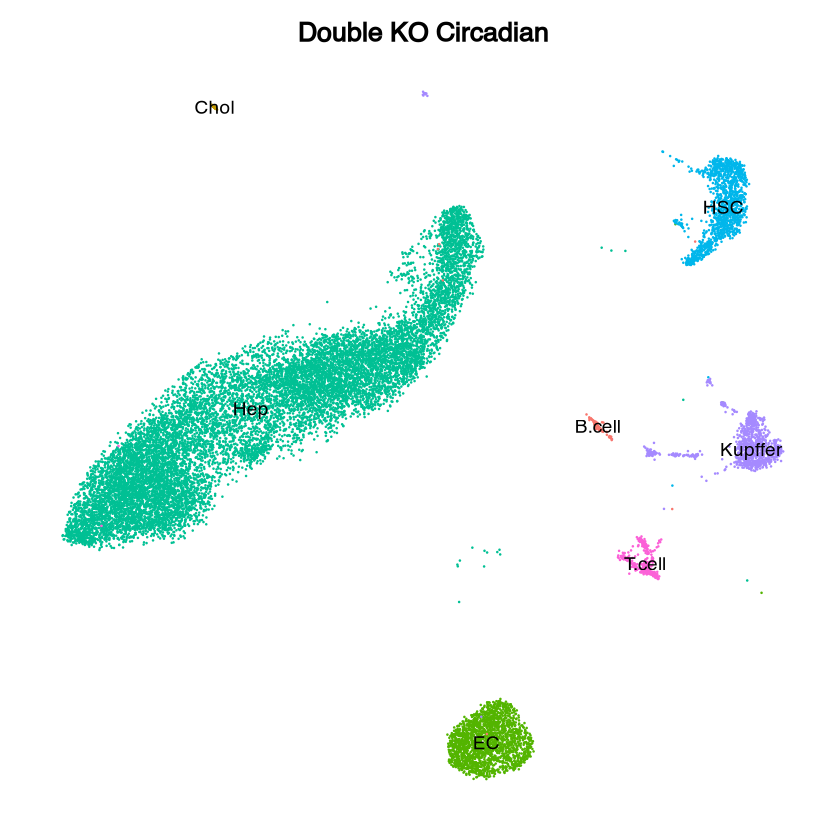

In [6]:
p <- DimPlot(data, group.by='cell_type', label=TRUE) +
   umap_theme() + ggtitle('Double KO Circadian') + NoLegend()

p

## WGCNA

In [29]:
DEGs <- read_delim('../../data/circ_hepa/hep_DEGs.txt', delim='\t')
colnames(DEGs) <- c('gene')

Rows: 1042 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): rownames(Hep.de_filt)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
DEGs$gene

[1] "Insig2"        "Bhmt"          "Gm31508"       "Mug1"         
   [5] "Npas2"         "Clpx"          "Ddc"           "Aass"         
   [9] "Arntl"         "Rhobtb1"       "Gldc"          "Kynu"         
  [13] "Tdo2"          "Cyp2b10"       "Gm36041"       "Igfbp1"       
  [17] "Chka"          "Ppard"         "Cbs"           "Cp"           
  [21] "Lnx2"          "Nfil3"         "Il1r1"         "Bcl2l1"       
  [25] "Cdo1"          "Arhgap24"      "Cyp3a11"       "Cth"          
  [29] "Irs2"          "Cps1"          "Pcca"          "Abtb2"        
  [33] "Mat1a"         "Abcb11"        "Slco1a4"       "Sult1d1"      
  [37] "Got1"          "Scarb1"        "Pah"           "Elovl5"       
  [41] "Ass1"          "Fgb"           "Setdb2"        "Elovl3"       
  [45] "Gm31333"       "Sds"           "Cyp4a14"       "Hsd17b6"      
  [49] "Fam222a"       "Slc25a15"      "Mug2"          "Mcc"          
  [53] "Cry1"          "Lamp2"         "Clock"         "Nedd4l"       
  [57] "Retreg1"       "Gm42031"       "Hgd"           "Fga"          
  [61] "Sntg1"         "Itih3"         "Map3k13"       "Cyp2c37"      
  [65] "Hal"           "Slc38a4"       "Pid1"          "Acmsd"        
  [69] "Rnf125"        "Cyp2c29"       "Lipc"          "Ei24"         
  [73] "Fgg"           "Fmo5"          "Cat"           "C9"           
  [77] "Fam214a"       "Rarres1"       "Atxn1"         "Dmgdh"        
  [81] "Cdip1"         "Fpgs"          "Carmil1"       "Cyp27a1"      
  [85] "Asap2"         "Agpat3"        "Etnk2"         "Baiap2"       
  [89] "Zbtb16"        "Myo1b"         "Sec24d"        "Lrp5"         
  [93] "Slc27a2"       "Mt1"           "Ablim3"        "Gm48199"      
  [97] "Fam20a"        "Ero1lb"        "Atp1b1"        "Nnmt"         
 [101] "Plg"           "Ctsl"          "Lgals9"        "Pcx"          
 [105] "Itih2"         "Stra6l"        "Tns1"          "Pptc7"        
 [109] "Acox2"         "Atp2a2"        "Ankrd33b"      "Skil"         
 [113] "Asap1"         "Pik3ap1"       "Ddah1"         "Elp4"         
 [117] "Sugct"         "Sik1"          "Nlrp12"        "Glt1d1"       
 [121] "Slc4a4"        "Cyp2j5"        "Prkca"         "Amdhd1"       
 [125] "Col18a1"       "Ppargc1b"      "Upp2"          "Acsl1"        
 [129] "Sel1l"         "Slc45a3"       "Cab39l"        "Nim1k"        
 [133] "4932438A13Rik" "Sec14l2"       "Mt2"           "Ell2"         
 [137] "Asl"           "Apoa1"         "Pon1"          "Ppargc1a"     
 [141] "Dirc2"         "Acat3"         "Lbp"           "Scfd2"        
 [145] "Desi2"         "Cpeb2"         "Snx29"         "Tacc2"        
 [149] "B930025P03Rik" "Gm15622"       "Cyp2c68"       "Plin4"        
 [153] "4732465J04Rik" "Txndc11"       "Ptprk"         "Dnajc3"       
 [157] "Lhpp"          "G6pc"          "Arg1"          "Plin5"        
 [161] "St5"           "Slc16a10"      "Asic5"         "Gnmt"         
 [165] "Crem"          "Fkbp5"         "Gpat4"         "Bhmt2"        
 [169] "Rora"          "Arl4a"         "Gbf1"          "Neb"          
 [173] "Etv6"          "Uap1"          "Pik3c2a"       "Tcim"         
 [177] "Aox3"          "Wbp1l"         "Pde7b"         "Mthfr"        
 [181] "Eif1a"         "Acnat1"        "Gm45044"       "Etfdh"        
 [185] "Fam169b"       "Nckap5"        "Chic2"         "Megf9"        
 [189] "Sec14l4"       "Pnrc1"         "Ror1"          "Dpp9"         
 [193] "Cdkn1a"        "Creg1"         "Stard5"        "Adcy9"        
 [197] "Slc7a2"        "Chd9"          "Nek1"          "Etnppl"       
 [201] "Pxmp4"         "4931406C07Rik" "Dpf3"          "Furin"        
 [205] "Sorbs2"        "Slain2"        "Dlc1"          "Msi2"         
 [209] "Fndc3b"        "Pfkfb1"        "Pecr"          "Hsp90b1"      
 [213] "Sdc4"          "Tmem131"       "Creb3l2"       "Edem1"        
 [217] "Apoc3"         "Tesk2"         "Cyp4a32"       "Hmgcs2"       
 [221] "Gucd1"         "Acss3"         "Gfra1"         "Atp11b"       
 [225] "Lpin1"         "Srp

In [36]:
data_WGCNA <- SetupForWGCNA(
  data,
  wgcna_name = "circ_DKO", # the gene selection approach
  features = DEGs$gene, # the features to use
)

In [44]:
data_WGCNA <- MetacellsByGroups(
  data_WGCNA,
  group.by = c("cell_type"),
  ident.group = "cell_type",
  k = 25,
  reduction = "pca",
  dims = NULL,
  assay = NULL,
  slot = "counts",
  layer = "counts",
  mode = "average",
  cells.use = NULL,
  min_cells = 100,
  max_shared = 15,
  target_metacells = 1000,
  max_iter = 5000,
  verbose = FALSE,
  wgcna_name = "circ_DKO"
)

Warning message in MetacellsByGroups(data_WGCNA, group.by = c("cell_type"), ident.group = "cell_type", :
“Removing the following groups that did not meet min_cells: Chol”


In [45]:
data_WGCNA <- NormalizeMetacells(data_WGCNA,wgcna_name = "circ_DKO")

In [46]:
data_WGCNA <- SetDatExpr(
  data_WGCNA,
  group_name = "Hep", # the name of the group of interest in the group.by column
  group.by='cell_type', # the metadata column containing the cell type info. This same column should have also been used in MetacellsByGroups
  assay = 'RNA', # using RNA assay
  layer = 'data' # using normalized data
)

In [47]:
# Test different soft powers:
data_WGCNA <- TestSoftPowers(
  data_WGCNA,
  networkType = 'signed' # you can also use "unsigned" or "signed hybrid"
)

pickSoftThreshold: will use block size 1042.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1042 of 1042


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1  0.15800 21.300          0.945 523.000  5.23e+02 544.00
2      2  0.00131 -0.537          0.769 282.000  2.80e+02 331.00
3      3  0.51000 -4.000          0.904 161.000  1.57e+02 224.00
4      4  0.77300 -3.230          0.954  97.100  9.20e+01 162.00
5      5  0.77600 -2.570          0.912  61.000  5.57e+01 122.00
6      6  0.82100 -2.140          0.932  39.800  3.47e+01  95.40
7      7  0.81100 -1.910          0.894  26.900  2.21e+01  76.40
8      8  0.81700 -1.760          0.885  18.700  1.43e+01  62.40
9      9  0.87100 -1.620          0.925  13.400  9.42e+00  51.90
10    10  0.89800 -1.540          0.941   9.830  6.24e+00  43.80
11    12  0.92400 -1.440          0.955   5.640  2.84e+00  32.20
12    14  0.94400 -1.360          0.970   3.480  1.35e+00  24.60
13    16  0.94000 -1.340          0.954   2.270  6.68e-01  19.20
14    18  0.94300 -1.300          0.967   1.550  3.36e-01  15.40
15    20  0.94600 -1.290 

  Power    SFT.R.sq      slope truncated.R.sq   mean.k. median.k.    max.k.
1     1 0.158155685 21.2633289      0.9452714 522.71899 522.97629 544.41334
2     2 0.001309908 -0.5369923      0.7692436 282.15946 279.72969 330.92144
3     3 0.510150459 -4.0032290      0.9041708 161.49137 156.89045 224.36702
4     4 0.773295587 -3.2269207      0.9541970  97.13722  92.04090 161.98574
5     5 0.776034737 -2.5662236      0.9123097  61.01282  55.68826 122.25160
6     6 0.821342565 -2.1363840      0.9317678  39.81816  34.70737  95.38195


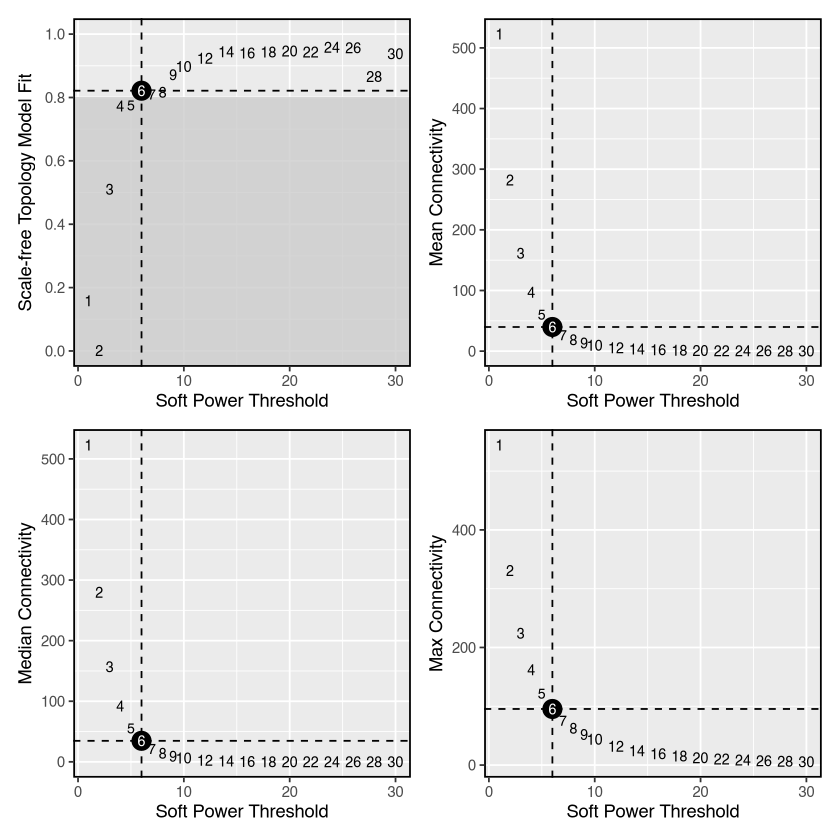

In [48]:
# plot the results:
plot_list <- PlotSoftPowers(data_WGCNA)

# assemble with patchwork
wrap_plots(plot_list, ncol=2)

In [63]:
# construct co-expression network:
data_WGCNA <- ConstructNetwork(
  data_WGCNA,
  tom_name = 'Hep' # name of the topoligical overlap matrix written to disk
)

ERROR: Error in ConstructNetwork(data_WGCNA, tom_name = "Hep"): TOM TOM/Hep_TOM.rda already exists. Set overwrite_tom = TRUE or change tom_name to proceed.


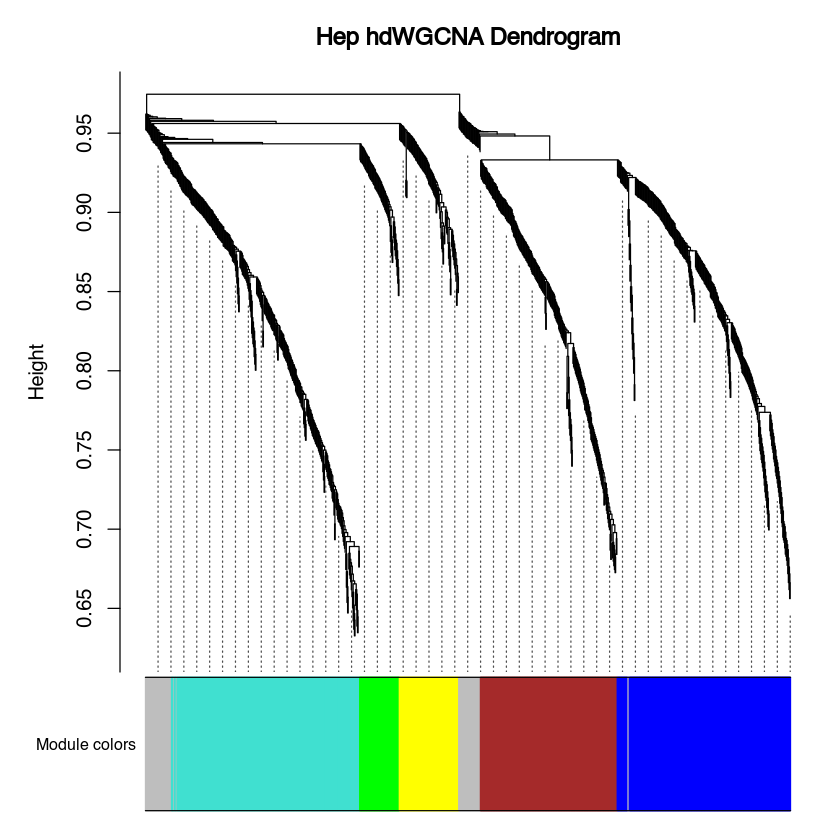

In [50]:
PlotDendrogram(data_WGCNA, main='Hep hdWGCNA Dendrogram')

In [61]:
data_WGCNA@assays$RNA@data

  [[ suppressing 32 column names ‘AAACCCAAGAAATGGG_1’, ‘AAACCCAAGCATCAGG_1’, ‘AAACCCAAGTTTCGAC_1’ ... ]]

  [[ suppressing 32 column names ‘AAACCCAAGAAATGGG_1’, ‘AAACCCAAGCATCAGG_1’, ‘AAACCCAAGTTTCGAC_1’ ... ]]

  [[ suppressing 32 column names ‘AAACCCAAGAAATGGG_1’, ‘AAACCCAAGCATCAGG_1’, ‘AAACCCAAGTTTCGAC_1’ ... ]]



19308 x 18239 sparse Matrix of class "dgCMatrix"
                                                                                        
Xkr4          .         .        .        .        .         .        .        .        
Gm1992        .         .        .        .        .         .        .        .        
Rp1           .         .        .        .        .         .        .        .        
Sox17         .         .        .        .        .         .        .        .        
Mrpl15        .         .        .        .        .         1.041400 .        .        
Lypla1        .         .        .        .        .         .        .        .        
Gm37988       .         .        .        .        0.8525126 1.041400 .        .        
Tcea1         .         .        .        .        .         .        1.466594 .        
Rgs20         .         .        .        .        .         .        .        .        
Atp6v1h       0.5236814 .        .        .        1.3059152 

In [62]:
data_WGCNA <- ModuleConnectivity(
  data_WGCNA,
  group.by = "cell_type",
  group_name = "Hep",
  corFnc = "bicor",
  corOptions = "use='p'",
  harmonized = FALSE,
  assay = NULL,
  slot = "data",
  layer = "data",
  sparse = TRUE,
  reassign_modules = TRUE,
  TOM_use = data_WGCNA,
  wgcna_name = "circ_DKO"
)

Warning message in value[[3L]](cond):
“TOM not found”


ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'


In [51]:
# rename the modules
data_WGCNA <- ResetModuleNames(
  data_WGCNA,
  new_name = "Hep-M"
)

ERROR: Error in names(x) <- value: 'names' attribute [9] must be the same length as the vector [3]


In [53]:
# plot genes ranked by kME for each module
p <- PlotKMEs(data_WGCNA, ncol=5)

p

ERROR: Error in `[.data.frame`(cur, , c("gene_name", "module", paste0("kME_", : undefined columns selected


In [65]:
# get the module assignment table:
modules <- GetModules(data_WGCNA) %>% subset(module != 'grey')

In [71]:
unique(modules$module)

[1] yellow    brown     turquoise blue      green    
Levels: yellow brown turquoise grey blue green

In [75]:
write_delim(as.data.frame(modules[modules$module == "green", ]$gene_name), "../../data/circ_hepa/hep_wgcna_green_genes.txt", delim='\t')

In [76]:
saveRDS(data_WGCNA, file = "../../data/circ_hepa/hep_wgcna.rds")

## Preprocessing

In [7]:
data_rna <- CreateSeuratObject(counts = data[["RNA"]]@counts, meta.data = data@meta.data)
data_rna <- NormalizeData(data_rna)
data_rna <- FindVariableFeatures(data_rna)


data_rna$cell_type <- gsub(pattern = "Hep.Zon.*", replacement = "Hep", data_rna$cell_type)

data_rna$celltype.stim <- paste(data_rna$cell_type, data_rna$stim, sep = "_")

data_rna$celltype.stim <- paste(data_rna$cell_type, data_rna$stim, sep = "_")

Idents(data_rna) <- data_rna$celltype.stim



In [ ]:
Hep.de <- FindMarkers(data_rna, ident.1 = "Hep_LDKO", ident.2 = "Hep_Ctrl", verbose = FALSE)


In [8]:
EC.de <- FindMarkers(data_rna, ident.1 = "EC_LDKO", ident.2 = "EC_Ctrl", verbose = FALSE)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



In [62]:
Kupffer.de <- FindMarkers(data_rna, ident.1 = "Kupffer_LDKO", ident.2 = "Kupffer_Ctrl", verbose = FALSE)

In [10]:
EC.de <- EC.de %>% 
  filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

In [12]:
write_delim(as.data.frame(rownames(EC.de)), '../../data/circ_hepa/EC_DEGs.txt', delim = "\t")

In [11]:
EC.de

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mug1,5.980916e-136,1.5994314,0.861,0.374,1.154795e-131
Insig2,5.146880e-69,1.3647252,0.338,0.042,9.937595e-65
Bhmt,1.734106e-66,1.3524824,0.381,0.068,3.348212e-62
Zbtb16,2.150698e-70,1.2447231,0.746,0.389,4.152568e-66
Cyp26b1,6.444606e-36,1.1402185,0.178,0.020,1.244324e-31
Plxnc1,5.383017e-55,0.9006422,0.854,0.612,1.039353e-50
Kynu,6.728760e-45,0.8902111,0.628,0.306,1.299189e-40
Col13a1,2.080505e-36,0.8698545,0.573,0.300,4.017038e-32
Clpx,3.104957e-34,0.8613628,0.354,0.119,5.995052e-30


In [63]:
head(Kupffer.de, n=20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gm42418,6.496699e-113,-1.0342042,1.000,1.000,1.254383e-108
Mug1,1.544168e-69,1.8342679,0.843,0.345,2.981479e-65
AY036118,9.826561e-59,-1.0448881,0.917,0.987,1.897312e-54
Elovl6,2.584863e-49,-1.6652653,0.149,0.583,4.990854e-45
Dlgap1,8.703306e-45,-1.7174250,0.197,0.585,1.680434e-40
Gm42031,3.922551e-42,1.4580719,0.715,0.343,7.573661e-38
Dgkb,1.767296e-40,-1.5795394,0.119,0.491,3.412295e-36
Peak1,4.513659e-39,-0.7041599,0.955,0.989,8.714973e-35
Insig2,6.777194e-39,1.4043068,0.376,0.046,1.308541e-34


In [76]:
write_delim(as.data.frame(rownames(data_rna)), '../../data/circ_hepa/all_genes.txt', delim = "\t")